In [1]:
import numpy as np 
# -- iquench -- 
from letstalkaboutquench import util as UT
from letstalkaboutquench import catalogs as Cats
from letstalkaboutquench import fstarforms as fSFS

In [2]:
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def stdCat(name): 
    ''' standard catalog in the paper
    '''
    cats = Cats.Catalog()
    logM, logSFR, _, censat = cats.Read(name)
    zero_sfr = cats.zero_sfr
    is_cen = (censat == 1) & (~zero_sfr)
    
    return logM[is_cen], logSFR[is_cen]

In [4]:
def eagleSmall(name, sfr='inst'): 
    ''' smaller boxes of EAGLE
    '''
    if name == 'lowres': 
        f_small = 'EAGLE_RefL0025N0376_MstarSFR1G100MyrinstPosVel_allabove1.8e8Msun.txt'
    elif name == 'hires': 
        f_small = 'EAGLE_RefL0025_MstarSFR100Myr_allabove2.26e7Msun.txt'
    elif name == 'hires_re': 
        f_small = 'EAGLE_RecalL0025_MstarSFR100Myr_allabove2.26e7Msun.txt'
        
    if sfr == 'inst': 
        cols = [2, 3, 6]
    elif sfr == '100myr':
        cols = [2, 5, 6]
    logM, SFR, censat = np.loadtxt(''.join([UT.dat_dir(), f_small]), skiprows=1, unpack=True, usecols=cols) 
    logSFR = np.log10(SFR)
    
    is_cen = (censat == 1) & np.isfinite(logSFR)
    return logM[is_cen], logSFR[is_cen]

# EAGLE
----
## Instantaneous SFR

Lets first read in the $100 Mpc$ box EAGLE simulation

In [5]:
logM_big, logSFR_big = stdCat('eagle_inst')

# small 25Mpc box with low resolution (same as big box)
logM_s_low, logSFR_s_low = eagleSmall('lowres', sfr='inst')

# small 25Mpc box with high resolution 
logM_s_hi, logSFR_s_hi = eagleSmall('hires', sfr='inst')

# small 25 Mpc box with high resolution RECALIBRATED
logM_s_hi_re, logSFR_s_hi_re = eagleSmall('hires_re', sfr='inst')

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:102: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_SFR) # log SFRs
/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ eagle_inst ------
10295 of 29810 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


(-4.0, 2.0)

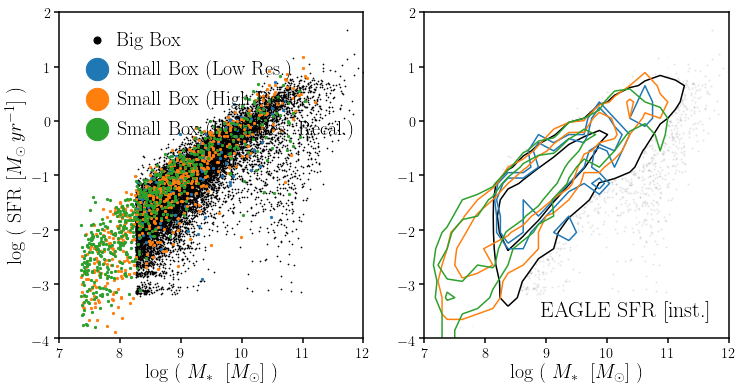

In [6]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_big, logSFR_big, c='k', s=0.5, label='Big Box')
sub.scatter(logM_s_low, logSFR_s_low, c='C0', s=5, label='Small Box (Low Res.)')
sub.scatter(logM_s_hi, logSFR_s_hi, c='C1', s=5, label='Small Box (High Res.)')
sub.scatter(logM_s_hi_re, logSFR_s_hi_re, c='C2', s=5, label='Small Box (High Res. Recal.)')
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_big, logSFR_big, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_low, logSFR_s_low, color='C0',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi, logSFR_s_hi, color='C1',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi_re, logSFR_s_hi_re, color='C2',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=10, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

Now lets fit the SFS for each of these boxes to see how different they are

In [7]:
fitSFS = fSFS.fstarforms() 
logM_sfs_big, logSFR_sfs_big, logSFR_sfs_err_big = fitSFS.fit(logM_big, logSFR_big, Nbin_thresh=25, n_bootstrap=100) 
logM_sfs_s_hi, logSFR_sfs_s_hi, logSFR_sfs_err_s_hi = fitSFS.fit(logM_s_hi, logSFR_s_hi, Nbin_thresh=25, n_bootstrap=100) 
logM_sfs_s_hi_re, logSFR_sfs_s_hi_re, logSFR_sfs_err_s_hi_re = fitSFS.fit(logM_s_hi_re, logSFR_s_hi_re, Nbin_thresh=25, n_bootstrap=100) 

(-4.0, 2.0)

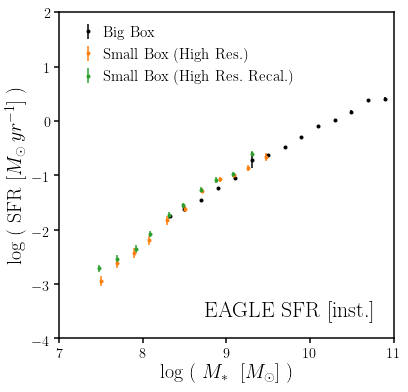

In [8]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.errorbar(logM_sfs_big, logSFR_sfs_big, yerr=logSFR_sfs_err_big, fmt='.k', label='Big Box')
sub.errorbar(logM_sfs_s_hi, logSFR_sfs_s_hi, yerr=logSFR_sfs_err_s_hi, fmt='.C1', label='Small Box (High Res.)')
sub.errorbar(logM_sfs_s_hi_re, logSFR_sfs_s_hi_re, yerr=logSFR_sfs_err_s_hi_re, fmt='.C2', label='Small Box (High Res. Recal.)')
sub.legend(loc='upper left', handletextpad=0., prop={'size':15})
sub.text(0.95, 0.05, 'EAGLE SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 11.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

## $100$ Myr SFR

In [9]:
logM_big, logSFR_big = stdCat('eagle_100myr')

# small 25Mpc box with low resolution (same as big box)
logM_s_low, logSFR_s_low = eagleSmall('lowres', sfr='100myr')

# small 25Mpc box with high resolution 
logM_s_hi, logSFR_s_hi = eagleSmall('hires', sfr='100myr')

# small 25 Mpc box with high resolution RECALIBRATED
logM_s_hi_re, logSFR_s_hi_re = eagleSmall('hires_re', sfr='100myr')

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ eagle_100myr ------
14743 of 29810 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


(-4.0, 2.0)

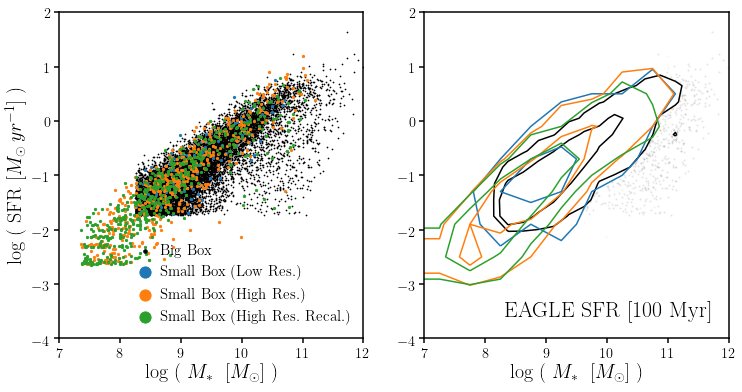

In [10]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_big, logSFR_big, c='k', s=0.5, label='Big Box')
sub.scatter(logM_s_low, logSFR_s_low, c='C0', s=5, label='Small Box (Low Res.)')
sub.scatter(logM_s_hi, logSFR_s_hi, c='C1', s=5, label='Small Box (High Res.)')
sub.scatter(logM_s_hi_re, logSFR_s_hi_re, c='C2', s=5, label='Small Box (High Res. Recal.)')
sub.legend(loc='lower right', markerscale=5, handletextpad=0., prop={'size':15})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_big, logSFR_big, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_low, logSFR_s_low, color='C0', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi, logSFR_s_hi, color='C1', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_s_hi_re, logSFR_s_hi_re, color='C2', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'EAGLE SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=5, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

In [11]:
fitSFS = fSFS.fstarforms() 
logM_sfs_big, logSFR_sfs_big, logSFR_sfs_err_big = fitSFS.fit(logM_big, logSFR_big, Nbin_thresh=25, n_bootstrap=100) 
logM_sfs_s_hi, logSFR_sfs_s_hi, logSFR_sfs_err_s_hi = fitSFS.fit(logM_s_hi, logSFR_s_hi, Nbin_thresh=25, n_bootstrap=100) 
logM_sfs_s_hi_re, logSFR_sfs_s_hi_re, logSFR_sfs_err_s_hi_re = fitSFS.fit(logM_s_hi_re, logSFR_s_hi_re, Nbin_thresh=25, n_bootstrap=100) 

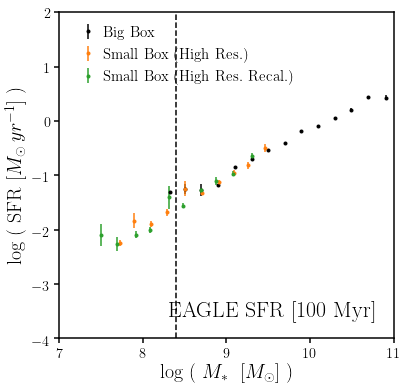

In [12]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.errorbar(logM_sfs_big, logSFR_sfs_big, yerr=logSFR_sfs_err_big, fmt='.k', label='Big Box')
sub.errorbar(logM_sfs_s_hi, logSFR_sfs_s_hi, yerr=logSFR_sfs_err_s_hi, fmt='.C1', label='Small Box (High Res.)')
sub.errorbar(logM_sfs_s_hi_re, logSFR_sfs_s_hi_re, yerr=logSFR_sfs_err_s_hi_re, fmt='.C2', label='Small Box (High Res. Recal.)')
sub.legend(loc='upper left', handletextpad=0., prop={'size':15})
sub.text(0.95, 0.05, 'EAGLE SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 11.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])
sub.vlines(8.4, sub.get_ylim()[0], sub.get_ylim()[1], color='k', linestyle='--')

# Illustris 
----
## Instantaneous SFR 

In [13]:
def illustrisLow(name, sfr='inst'): 
    ''' smaller boxes of EAGLE
    '''
    if name == 'low': 
        f_low = 'Illustris2_extended_individual_galaxy_values_all1e8Msunh_z0.csv'
        mlim = 9.
    elif name == 'lower': 
        f_low = 'Illustris3_extended_individual_galaxy_values_all1e8Msunh_z0.csv'
        mlim = 9.9

    if sfr == 'inst': 
        cols = [0, 1, -1]
    elif sfr == '100myr':
        cols = [0, 4, -1]
    logM, SSFR, censat = np.loadtxt(''.join([UT.dat_dir(), f_low]), skiprows=1, unpack=True, usecols=cols, delimiter=',') 
    logSFR = np.log10(SSFR) + logM

    is_cen = (censat == 1) & np.isfinite(logSFR) & (logM > mlim)
    return logM[is_cen], logSFR[is_cen]

In [14]:
logM_std, logSFR_std = stdCat('illustris_inst')

# same size box with low resolution
logM_low, logSFR_low = illustrisLow('low', sfr='inst')

# same size box with lower resolution 
logM_lower, logSFR_lower = illustrisLow('lower', sfr='inst')

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:83: RuntimeWarning: divide by zero encountered in log10
  logSFR = np.log10(_ssfr) + logM # calculate log SFR from sSFR
/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ illustris_inst ------
7000 of 66808 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


(-4.0, 2.0)

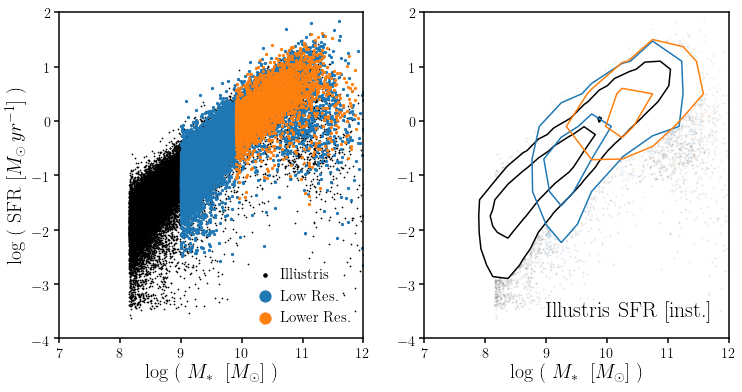

In [15]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_std, logSFR_std, c='k', s=0.5, label='Illustris')
sub.scatter(logM_low, logSFR_low, c='C0', s=5, label='Low Res.')
sub.scatter(logM_lower, logSFR_lower, c='C1', s=5, label='Lower Res.')
sub.legend(loc='lower right', markerscale=5, handletextpad=0., prop={'size':15})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_std, logSFR_std, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_low, logSFR_low, color='C0', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_lower, logSFR_lower, color='C1', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'Illustris SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=5, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

In [17]:
logM_sfs_std, logSFR_sfs_std, logSFR_sfs_err_std = fitSFS.fit(logM_std, logSFR_std, Nbin_thresh=100, n_bootstrap=100)

In [16]:
logM_sfs_low, logSFR_sfs_low, logSFR_sfs_err_low = fitSFS.fit(logM_low, logSFR_low, Nbin_thresh=100, n_bootstrap=100) 

In [18]:
logM_sfs_lower, logSFR_sfs_lower, logSFR_sfs_err_lower = fitSFS.fit(logM_lower, logSFR_lower, Nbin_thresh=100, n_bootstrap=100) 

(-4.0, 2.0)

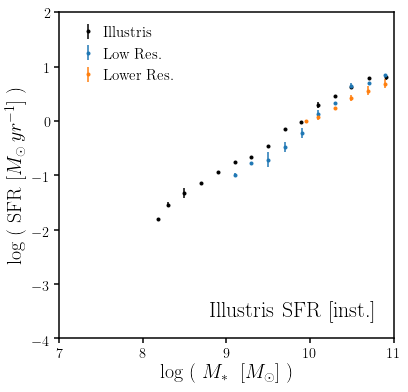

In [19]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.errorbar(logM_sfs_std, logSFR_sfs_std, yerr=logSFR_sfs_err_std, fmt='.k', label='Illustris')
sub.errorbar(logM_sfs_low, logSFR_sfs_low, yerr=logSFR_sfs_err_low, fmt='.C0', label='Low Res.')
sub.errorbar(logM_sfs_lower, logSFR_sfs_lower, yerr=logSFR_sfs_err_lower, fmt='.C1', label='Lower Res.')
sub.legend(loc='upper left', handletextpad=0., prop={'size':15})
sub.text(0.95, 0.05, 'Illustris SFR [inst.]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 11.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])
#sub.vlines(8.4, sub.get_ylim()[0], sub.get_ylim()[1], color='k', linestyle='--')

## 100 Myr

In [20]:
logM_std, logSFR_std = stdCat('illustris_100myr')

# same size box with low resolution
logM_low, logSFR_low = illustrisLow('low', sfr='100myr')

# same size box with lower resolution 
logM_lower, logSFR_lower = illustrisLow('lower', sfr='100myr')

/anaconda2/lib/python2.7/site-packages/letstalkaboutquench/catalogs.py:223: UserWarning: 
------ illustris_100myr ------
16943 of 66808 galaxies have 0/non-finite SFRs
  warnings.warn(msg_warn)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


(-4.0, 2.0)

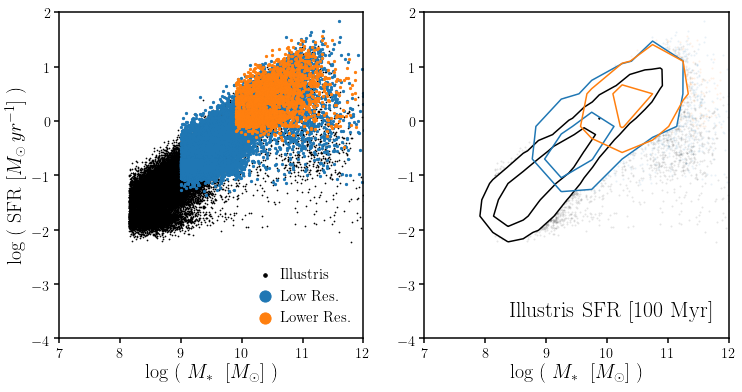

In [21]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.scatter(logM_std, logSFR_std, c='k', s=0.5, label='Illustris')
sub.scatter(logM_low, logSFR_low, c='C0', s=5, label='Low Res.')
sub.scatter(logM_lower, logSFR_lower, c='C1', s=5, label='Lower Res.')
sub.legend(loc='lower right', markerscale=5, handletextpad=0., prop={'size':15})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])

sub = fig.add_subplot(122)
plot_range = [[7., 12.], [-4., 2.]]
DFM.hist2d(logM_std, logSFR_std, color='k',
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_low, logSFR_low, color='C0', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
DFM.hist2d(logM_lower, logSFR_lower, color='C1', bins=10, 
           levels=[0.68, 0.95], range=plot_range, plot_density=False, fill_contours=False, ax=sub)
sub.text(0.95, 0.05, 'Illustris SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.legend(loc='upper left', markerscale=5, handletextpad=0., prop={'size':20})
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 12.])
sub.set_ylim([-4., 2.])

In [22]:
logM_sfs_std, logSFR_sfs_std, logSFR_sfs_err_std = fitSFS.fit(logM_std, logSFR_std, Nbin_thresh=100, n_bootstrap=100)

In [23]:
logM_sfs_low, logSFR_sfs_low, logSFR_sfs_err_low = fitSFS.fit(logM_low, logSFR_low, Nbin_thresh=100, n_bootstrap=100) 

In [24]:
logM_sfs_lower, logSFR_sfs_lower, logSFR_sfs_err_lower = fitSFS.fit(logM_lower, logSFR_lower, Nbin_thresh=100, n_bootstrap=100) 

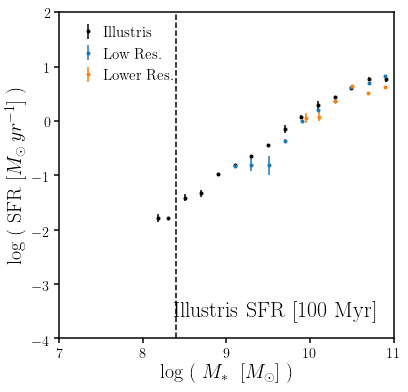

In [25]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.errorbar(logM_sfs_std, logSFR_sfs_std, yerr=logSFR_sfs_err_std, fmt='.k', label='Illustris')
sub.errorbar(logM_sfs_low, logSFR_sfs_low, yerr=logSFR_sfs_err_low, fmt='.C0', label='Low Res.')
sub.errorbar(logM_sfs_lower, logSFR_sfs_lower, yerr=logSFR_sfs_err_lower, fmt='.C1', label='Lower Res.')
sub.legend(loc='upper left', handletextpad=0., prop={'size':15})
sub.text(0.95, 0.05, 'Illustris SFR [100 Myr]', ha='right', va='bottom', transform=sub.transAxes, fontsize=22)
sub.set_xlabel(r'log ( $M_* \;\;[M_\odot]$ )', fontsize=20)
sub.set_xlim([7., 11.])
sub.set_ylabel(r'log ( SFR $[M_\odot \, yr^{-1}]$ )', fontsize=20)
sub.set_ylim([-4., 2.])
sub.vlines(8.4, sub.get_ylim()[0], sub.get_ylim()[1], color='k', linestyle='--')